## 1 Create a simple XOR model
Code copied from the folder https://github.com/Red-Rapious/Semiring-LRP, and particularly the code/xor* files.

In [101]:
import numpy
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import copy

from helper_functions import plot_decision_boundary

In [102]:
device = torch.device('cpu')

In [103]:
inputs=2
output=1
hl1=5

model_lin = nn.Sequential(
    nn.Linear(inputs, output),
).to(device)

model = nn.Sequential(
    nn.Linear(inputs,hl1),
    nn.ReLU(),
    nn.Linear(hl1,output)
).to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [104]:
data = torch.tensor(
    [
        [0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]
    ]
)
labels = torch.tensor([0., 1., 1., 0.])

In [105]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return correct / len(y_pred) * 100

In [106]:
epochs = 1000
for epoch in range(epochs):
    y_logits = model(data).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, labels)
    acc = accuracy_fn(labels, y_preds)

    if epoch % (epochs//10) == 0:
        print(f"[EPOCH {epoch+1}/{epochs}] Loss: {loss} | Accuracy: {acc}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

y_logits = model(data).squeeze()
y_preds = torch.round(torch.sigmoid(y_logits))
acc = accuracy_fn(labels, y_preds)
print(f"[FINAL] Accuracy: {acc}")

[EPOCH 1/1000] Loss: 0.6767231225967407 | Accuracy: 75.0
[EPOCH 101/1000] Loss: 0.5907045602798462 | Accuracy: 75.0
[EPOCH 201/1000] Loss: 0.4170531630516052 | Accuracy: 100.0
[EPOCH 301/1000] Loss: 0.20852017402648926 | Accuracy: 100.0
[EPOCH 401/1000] Loss: 0.10632508993148804 | Accuracy: 100.0
[EPOCH 501/1000] Loss: 0.06308775395154953 | Accuracy: 100.0
[EPOCH 601/1000] Loss: 0.04241442307829857 | Accuracy: 100.0
[EPOCH 701/1000] Loss: 0.030657919123768806 | Accuracy: 100.0
[EPOCH 801/1000] Loss: 0.023626383394002914 | Accuracy: 100.0
[EPOCH 901/1000] Loss: 0.018896477296948433 | Accuracy: 100.0
[FINAL] Accuracy: 100.0


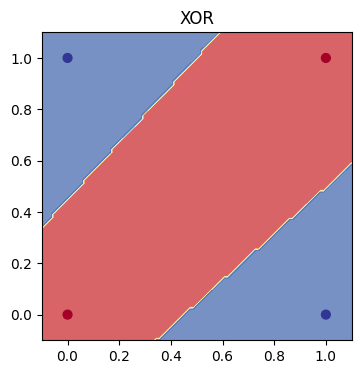

In [107]:
plt.figure(figsize=(4, 4))
plt.title("XOR")
plot_decision_boundary(model, data, labels)

## Transform the model

In [108]:
# Loading parameters

for param in model.parameters():
    print(param)

print(12)

state_dict = model.state_dict()

print(13)

for param_tensor in state_dict:
    print(f"{param_tensor}: {state_dict[param_tensor].size()}")

Parameter containing:
tensor([[-0.2620,  0.5894],
        [ 0.3323,  0.2397],
        [-2.5510,  2.5525],
        [ 0.1315,  0.1077],
        [ 2.3951, -2.3951]], requires_grad=True)
Parameter containing:
tensor([ 1.2715e+00,  6.7122e-01,  4.4280e-04, -7.5191e-02, -1.1477e-03],
       requires_grad=True)
Parameter containing:
tensor([[-1.3827, -0.6385,  3.5330, -0.0968,  3.2789]], requires_grad=True)
Parameter containing:
tensor([-1.4383], requires_grad=True)
12
13
0.weight: torch.Size([5, 2])
0.bias: torch.Size([5])
2.weight: torch.Size([1, 5])
2.bias: torch.Size([1])


In [109]:
def convert_parameters_to_integers(model):
    with torch.no_grad():  # Ensure no gradients are calculated
        for param in model.parameters():
            param.copy_(param.int())

# Before conversion
print("Model parameters before conversion to integers:")
for param in model.parameters():
    print(param)

continuous_model = copy.deepcopy(model)

# Convert parameters
convert_parameters_to_integers(model)

# After conversion
print("\nModel parameters after conversion to integers:")
for param in model.parameters():
    print(param)

Model parameters before conversion to integers:
Parameter containing:
tensor([[-0.2620,  0.5894],
        [ 0.3323,  0.2397],
        [-2.5510,  2.5525],
        [ 0.1315,  0.1077],
        [ 2.3951, -2.3951]], requires_grad=True)
Parameter containing:
tensor([ 1.2715e+00,  6.7122e-01,  4.4280e-04, -7.5191e-02, -1.1477e-03],
       requires_grad=True)
Parameter containing:
tensor([[-1.3827, -0.6385,  3.5330, -0.0968,  3.2789]], requires_grad=True)
Parameter containing:
tensor([-1.4383], requires_grad=True)

Model parameters after conversion to integers:
Parameter containing:
tensor([[ 0.,  0.],
        [ 0.,  0.],
        [-2.,  2.],
        [ 0.,  0.],
        [ 2., -2.]], requires_grad=True)
Parameter containing:
tensor([1., 0., 0., 0., 0.], requires_grad=True)
Parameter containing:
tensor([[-1.,  0.,  3.,  0.,  3.]], requires_grad=True)
Parameter containing:
tensor([-1.], requires_grad=True)


Accuracy of continuous model: 100.0.
Accuracy of discrete model: 100.0.


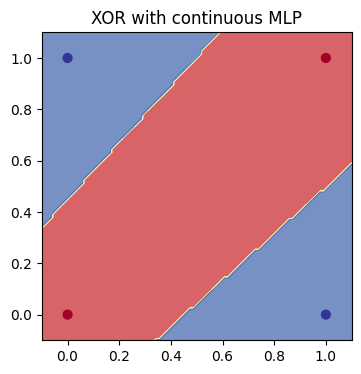

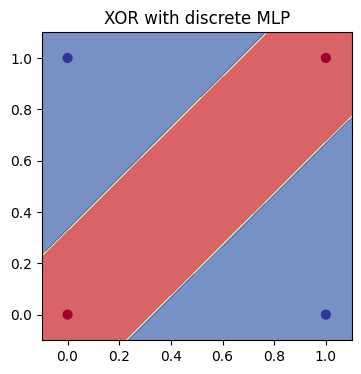

In [110]:
plt.figure(figsize=(4, 4))
plt.title("XOR with continuous MLP")
plot_decision_boundary(continuous_model, data, labels)

y_preds_continuous = torch.round(torch.sigmoid(continuous_model(data).squeeze()))
print(f"Accuracy of continuous model: {accuracy_fn(labels, y_preds_continuous)}." )

plt.figure(figsize=(4, 4))
plt.title("XOR with discrete MLP")
plot_decision_boundary(model, data, labels)

y_preds_discrete = torch.round(torch.sigmoid(model(data).squeeze()))
print(f"Accuracy of discrete model: {accuracy_fn(labels, y_preds_discrete)}." )

Accuracy of continuous model: 100.0.


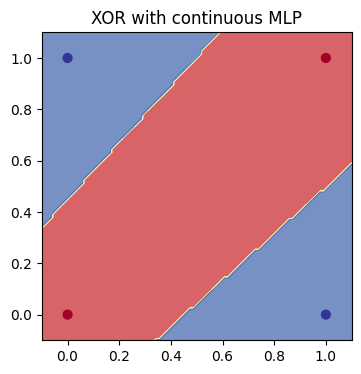

Accuracy of discrete model: 100.0.


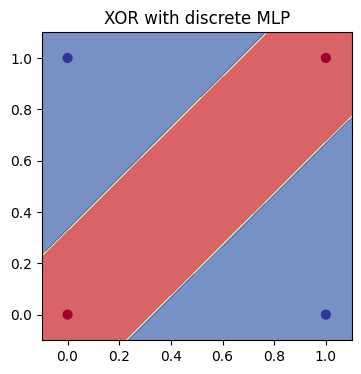

In [114]:
plt.figure(figsize=(4, 4))
plt.title("XOR with continuous MLP")
plot_decision_boundary(continuous_model, data, labels)

y_preds_continuous = torch.round(torch.sigmoid(continuous_model(data).squeeze()))
print(f"Accuracy of continuous model: {accuracy_fn(labels, y_preds_continuous)}." )

plt.savefig("continuous_xor.pdf", format="pdf", bbox_inches="tight")
plt.show()

plt.figure(figsize=(4, 4))
plt.title("XOR with discrete MLP")
plot_decision_boundary(model, data, labels)

y_preds_discrete = torch.round(torch.sigmoid(model(data).squeeze()))
print(f"Accuracy of discrete model: {accuracy_fn(labels, y_preds_discrete)}." )

plt.savefig("discrete_xor.pdf", format="pdf", bbox_inches="tight")
plt.show()